In [92]:
!pip3 install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 2.6 MB/s eta 0:00:002.7 MB/s eta 0:00:01

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [94]:
#conda activate python_eda 
import requests
from dotenv import load_dotenv
import os
import xml.etree.ElementTree as ET
import xml.dom.minidom
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

load_dotenv()


True

In [201]:

API = os.getenv("API_KEY")

CODE = "151Y001"
TITLE = "가계신용(업권별, 분기)"

REQUEST_START = 1
REQUEST_END = 100
DATATYPE = "json"
TERM_STANDARD = {"year": "A", "half_year": "S", "quater":"Q", "month": "M", "half_month":"SM", "day": "D"}
TERM = TERM_STANDARD["quater"]

SEARCH_FROM = "2000Q1"
SERCH_TO = "2024Q4"
#검색시작일자(주기에 맞는 형식으로 입력: 2015, 2015Q1, 201501, 20150101 등)
ITEMCODE_1 = "1100000"
ITEMCODE_2 = "?"
ITEMCODE_3 = "?"
url = f'https://ecos.bok.or.kr/api/StatisticSearch/{API}/{DATATYPE}/kr/{REQUEST_START}/{REQUEST_END}/{CODE}/{TERM}/{SEARCH_FROM}/{SERCH_TO}/{ITEMCODE_1}/{ITEMCODE_2}/{ITEMCODE_3}'




In [202]:
res = requests.get(url)
print(res.status_code)

200


In [204]:


json_text=""

if res.status_code == 200:
    if DATATYPE == "xml":
        try: 
            contents = res.text
            ecosRoot = ET.fromstring(contents)

            if ecosRoot[0].text[:4] in ("INFO", "ERRO"):
                print(ecosRoot[0].text + ":" + ecosRoot[1].text)
            else:
                dom = xml.dom.minidom.parseString(contents)
                pretty_xml_as_string = dom.toprettyxml(indent="     ")

                xml_path = f"./{CODE}.xml"
                with open(xml_path, "w") as f:
                    f.write(pretty_xml_as_string)
        except Exception as e:
            print(str(e))
    elif DATATYPE == "json":
        try:
            contents = res.text
            data = json.loads(contents)
            json_filename = f"./{TITLE}_{ITEMCODE_1}_{SEARCH_FROM}_{SERCH_TO}.json"
            json_text = data
            with open(json_filename, 'w') as f:
                json.dump(data, f, indent=4)
        except Exception as e:
            print(str(e))
            

In [205]:
print(json_text)

{'StatisticSearch': {'list_total_count': 85, 'row': [{'STAT_CODE': '151Y001', 'STAT_NAME': '1.2.4.1.1. 가계신용(업권별, 분기)', 'ITEM_CODE1': '1100000', 'ITEM_NAME1': '가계대출', 'ITEM_CODE2': None, 'ITEM_NAME2': None, 'ITEM_CODE3': None, 'ITEM_NAME3': None, 'ITEM_CODE4': None, 'ITEM_NAME4': None, 'UNIT_NAME': '십억원 ', 'WGT': None, 'TIME': '2002Q4', 'DATA_VALUE': '416771.4'}, {'STAT_CODE': '151Y001', 'STAT_NAME': '1.2.4.1.1. 가계신용(업권별, 분기)', 'ITEM_CODE1': '1100000', 'ITEM_NAME1': '가계대출', 'ITEM_CODE2': None, 'ITEM_NAME2': None, 'ITEM_CODE3': None, 'ITEM_NAME3': None, 'ITEM_CODE4': None, 'ITEM_NAME4': None, 'UNIT_NAME': '십억원 ', 'WGT': None, 'TIME': '2003Q1', 'DATA_VALUE': '420744.5'}, {'STAT_CODE': '151Y001', 'STAT_NAME': '1.2.4.1.1. 가계신용(업권별, 분기)', 'ITEM_CODE1': '1100000', 'ITEM_NAME1': '가계대출', 'ITEM_CODE2': None, 'ITEM_NAME2': None, 'ITEM_CODE3': None, 'ITEM_NAME3': None, 'ITEM_CODE4': None, 'ITEM_NAME4': None, 'UNIT_NAME': '십억원 ', 'WGT': None, 'TIME': '2003Q2', 'DATA_VALUE': '428053.6'}, {'STAT_CODE

In [206]:

rows = json.dumps(json_text["StatisticSearch"]["row"])

df = pd.read_json(rows)

print(df)


   STAT_CODE                 STAT_NAME  ITEM_CODE1 ITEM_NAME1  ITEM_CODE2  \
0    151Y001  1.2.4.1.1. 가계신용(업권별, 분기)     1100000       가계대출         NaN   
1    151Y001  1.2.4.1.1. 가계신용(업권별, 분기)     1100000       가계대출         NaN   
2    151Y001  1.2.4.1.1. 가계신용(업권별, 분기)     1100000       가계대출         NaN   
3    151Y001  1.2.4.1.1. 가계신용(업권별, 분기)     1100000       가계대출         NaN   
4    151Y001  1.2.4.1.1. 가계신용(업권별, 분기)     1100000       가계대출         NaN   
..       ...                       ...         ...        ...         ...   
80   151Y001  1.2.4.1.1. 가계신용(업권별, 분기)     1100000       가계대출         NaN   
81   151Y001  1.2.4.1.1. 가계신용(업권별, 분기)     1100000       가계대출         NaN   
82   151Y001  1.2.4.1.1. 가계신용(업권별, 분기)     1100000       가계대출         NaN   
83   151Y001  1.2.4.1.1. 가계신용(업권별, 분기)     1100000       가계대출         NaN   
84   151Y001  1.2.4.1.1. 가계신용(업권별, 분기)     1100000       가계대출         NaN   

    ITEM_NAME2  ITEM_CODE3  ITEM_NAME3  ITEM_CODE4  ITEM_NAME4 UNIT_NAME  W

/var/folders/1p/6n2gzbzs6fjfmqk7tjxg38sw0000gn/T/ipykernel_95194/419277460.py:3: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_json(rows)


/Users/jean/.pyenv/versions/3.9.18/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jean/.pyenv/versions/3.9.18/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52292 (\N{HANGUL SYLLABLE CAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


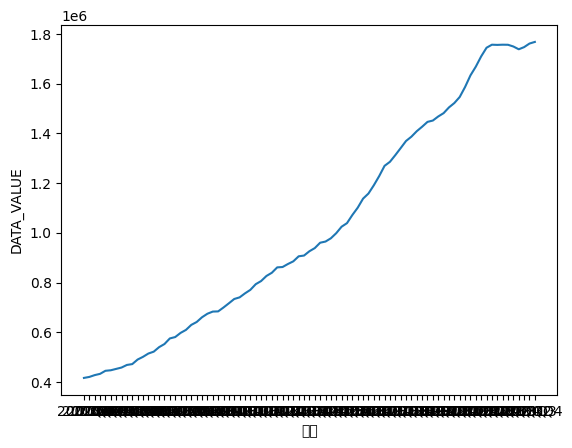

In [207]:
# df['TIME'] = pd.to_datetime(df['TIME'], format='%Y')
sns.lineplot(data=df, x=df["TIME"], y=df["DATA_VALUE"])

plt.xlabel('TIME')
plt.xlabel('부채')

plt.show()